In [1]:
import numpy as np # linear algebra
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data['slope'].unique()

array([0, 2, 1], dtype=int64)

In [6]:
data.shape

(303, 14)

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Let's analyse a bit

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

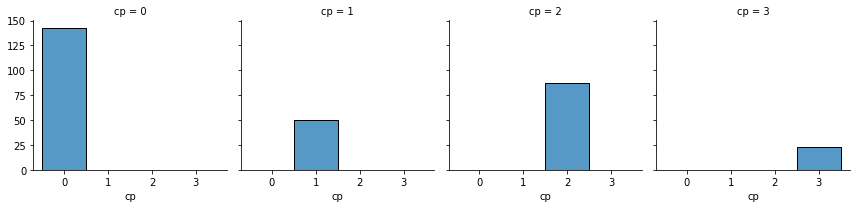

In [9]:
g=sns.FacetGrid(data,col='cp')
g.map(sns.histplot,"cp")

Age Groups with CP

<AxesSubplot:xlabel='age', ylabel='cp'>

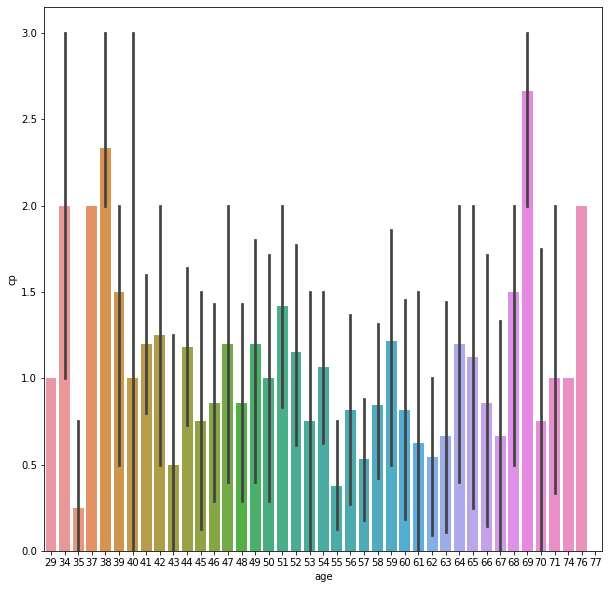

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x='age',y='cp',data=data)


Age with trestbps

<AxesSubplot:xlabel='age', ylabel='trestbps'>

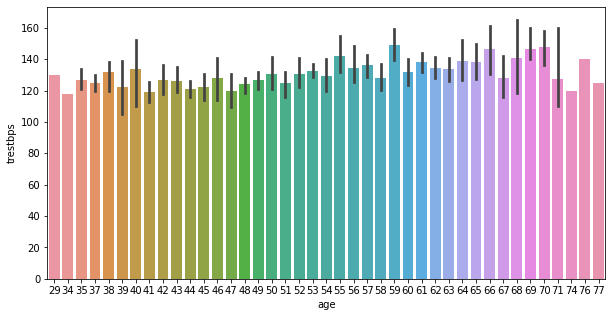

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='trestbps',data=data)

Age with chol

<AxesSubplot:xlabel='age', ylabel='chol'>

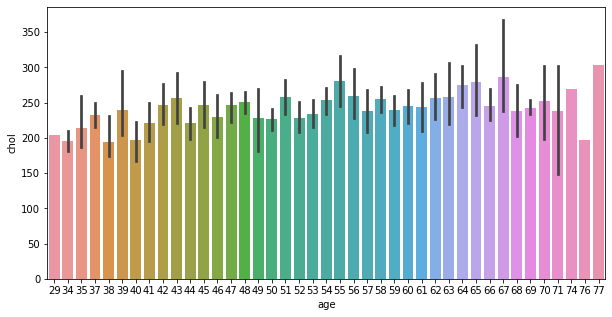

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='chol',data=data)

In [13]:
# Matrix for data reading

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

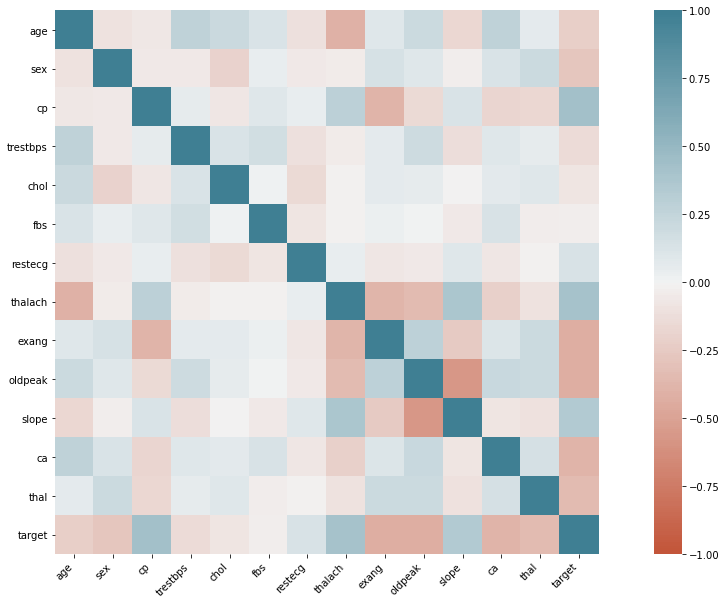

In [14]:
corr = data.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Analyse the Corelation matrix and find out that the corelation of target value and fbs is 0 , so we can drop fbs

**Preprocessing**

In [32]:
new_data=data.drop(columns=['fbs'])

In [33]:
new_data

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,1,115,1,1.2,1,1,3,0


**split the data into train and test**

In [18]:
X=new_data.drop(columns=['target'])
Y=new_data['target']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Let's apply multiple models

1. SVC 

In [20]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [21]:
Y_pred1=classifier.predict(x_test)

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, Y_pred1)

0.7532467532467532

2. Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [24]:
y_pred2=classifier.predict(x_test)

In [25]:
f1_score(y_test,y_pred2)

0.8571428571428571

Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [27]:
y_pred3=classifier.predict(x_test)

In [28]:
f1_score(y_test,y_pred3)

0.8235294117647058

In my conclusion, Naive Bayes suits much better and provide good score rather than other famous algorithms in this specific case.

Let's Create confussion matrix for naive bayes

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)


In [30]:
cm

array([[21,  6],
       [ 4, 30]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

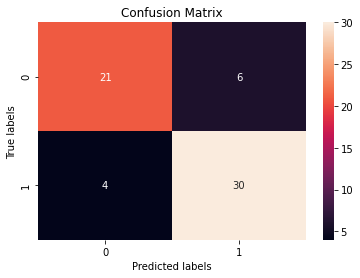

In [31]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')